<a href="https://colab.research.google.com/github/dhcryan/kaggle_challenge_/blob/main/week6/kbo_donghun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 외국인 투수의 스카우팅을 위한 최적화 경진대회
- Time series, Recommendation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -qq '/content/drive/MyDrive/kaggle/68346_KBO_foreign_pitcher_data.zip'

In [3]:
import matplotlib
import pandas as pd
import numpy as sns
import seaborn as sns
import statsmodels.api as sm
print(matplotlib.__version__) 

3.2.2


## **EDA 간단한 분석**

### KBO/팬그래프 데이터

In [4]:
import pandas as pd

#데이터셋 불러오기 
atKbo_11_18_KboRegSsn = pd.read_csv("kbo_yearly_foreigners_2011_2018.csv")

atKbo_11_18_MlbTot = pd.read_csv("fangraphs_foreigners_2011_2018.csv")

# 신규 외국인 투수 MLB 성적
atKbo_19_MlbTot = pd.read_csv("fangraphs_foreigners_2019.csv")

In [5]:
print(atKbo_11_18_KboRegSsn.shape)
print(atKbo_11_18_MlbTot.shape)
print(atKbo_19_MlbTot.shape)

(105, 11)
(205, 19)
(41, 19)


MLB기록들은 연도에 상관없이 feature가 19개, 행의 수만 다르다.

In [6]:
print(atKbo_11_18_KboRegSsn.columns)
print(atKbo_11_18_MlbTot.columns)
print(atKbo_19_MlbTot.columns)

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')


kbo리그에서의 성적을 살펴봅시다(11-18시즌)

,ERA,TBF
count,105.000000,105.000000
mean,4.714286,558.980952
std,1.733072,224.436816
min,2.380000,40.000000
25%,3.740000,349.000000
50%,4.420000,622.000000
75%,5.230000,758.000000
max,15.750000,870.000000


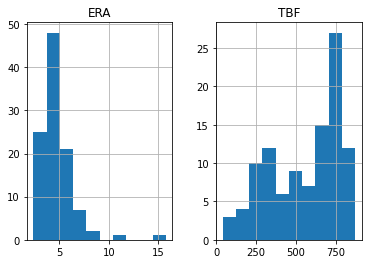

In [7]:
atKbo_11_18_KboRegSsn[['ERA','TBF']].hist()
atKbo_11_18_KboRegSsn[['ERA','TBF']].describe()

mlb에서의 성적을 살펴봅시다

              ERA         TBF
count  205.000000  205.000000
mean     5.750585  193.160976
std      3.404285  186.000312
min      0.000000    4.000000
25%      4.050000   57.000000
50%      5.200000  126.000000
75%      6.750000  263.000000
max     27.000000  827.000000


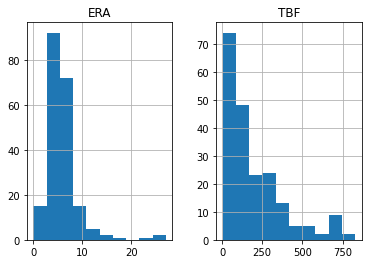

In [8]:
atKbo_11_18_MlbTot[['ERA', 'TBF']].hist()
print(atKbo_11_18_MlbTot[['ERA', 'TBF']].describe())

`groupby` 함수를 통해 투수별로 묶어준 뒤에 era의 평균값 구해준다

In [15]:
m_mean=(atKbo_11_18_MlbTot.groupby('pitcher_name')['ERA'].mean().reset_index().rename(columns={'ERA':'MLB_mean'}))
k_mean=(atKbo_11_18_KboRegSsn.groupby('pitcher_name')['ERA'].mean().reset_index().rename(columns={'ERA':'KBO_mean'}))
df=pd.merge(m_mean,k_mean,how='inner',on='pitcher_name')
df

,pitcher_name,MLB_mean,KBO_mean
0,니퍼트,4.290000,3.687500
1,다이아몬드,10.262500,4.420000
2,듀브론트,5.106667,4.920000
3,레나도,7.306667,6.800000
4,레온,6.050000,11.250000
5,레이예스,12.956667,5.695000
6,레일리,6.640000,4.197500
7,로저스,5.771667,3.690000
8,루카스,5.687143,4.930000
9,리즈,4.240000,3.543333


데이터 간의 관계를 살펴보자

          MLB_mean  KBO_mean
MLB_mean  1.000000  0.107744
KBO_mean  0.107744  1.000000


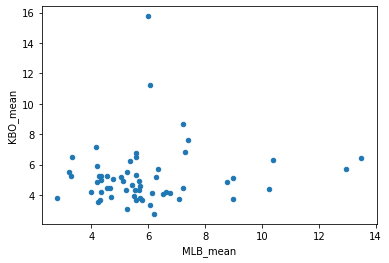

In [16]:
df.plot(kind='scatter',x='MLB_mean',y='KBO_mean')
print(df.corr())

ERA 만으로는 KBO에서의 투수 활약을 예측하기는 어렵다

### statcast data를 통한 야구 지표 분석

In [17]:
atKbo_11_18_StatCast = pd.read_csv("baseball_savant_foreigners_2011_2018.csv")
atKbo_19_StatCast = pd.read_csv("baseball_savant_foreigners_2019.csv")
print(atKbo_11_18_StatCast.shape)
print(atKbo_19_StatCast.shape)

(135753, 24)
(21903, 24)


구질 데이터가 있어서 24개의 column으로 구성됨

In [ ]:
print(atKbo_11_18_StatCast.columns)
print(atKbo_19_StatCast.columns)

In [21]:
atKbo_11_18_StatCast.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135753 entries, 0 to 135752
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   game_date          135753 non-null  object 
 1   release_speed      135534 non-null  float64
 2   batter             135684 non-null  float64
 3   pitcher            135753 non-null  int64  
 4   events             35707 non-null   object 
 5   description        135753 non-null  object 
 6   zone               135534 non-null  float64
 7   stand              135753 non-null  object 
 8   p_throws           135753 non-null  object 
 9   bb_type            26575 non-null   object 
 10  balls              135753 non-null  int64  
 11  strikes            135753 non-null  int64  
 12  pfx_x              135534 non-null  float64
 13  pfx_z              135534 non-null  float64
 14  plate_x            135534 non-null  float64
 15  plate_z            135534 non-null  float64
 16  ax

<ipython-input-21-3edf36250321>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  atKbo_11_18_StatCast.info(null_counts=True


이 중에서 문자열 데이터인 events, description, pitch name에 주목

타석에 대한 결과 :  events

nan이 많겠죠

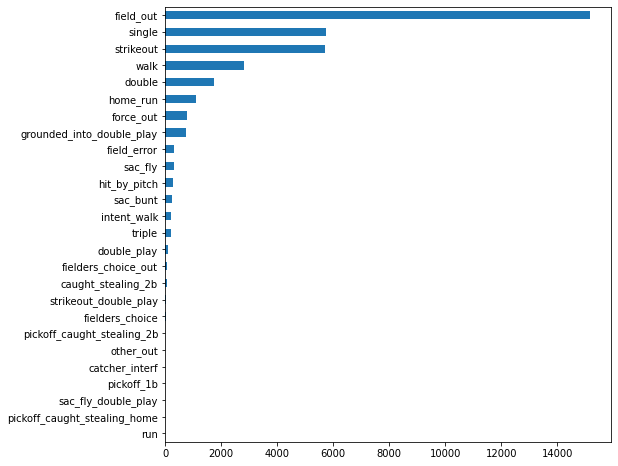

In [24]:
atKbo_11_18_StatCast['events'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))

description : 공의 결과

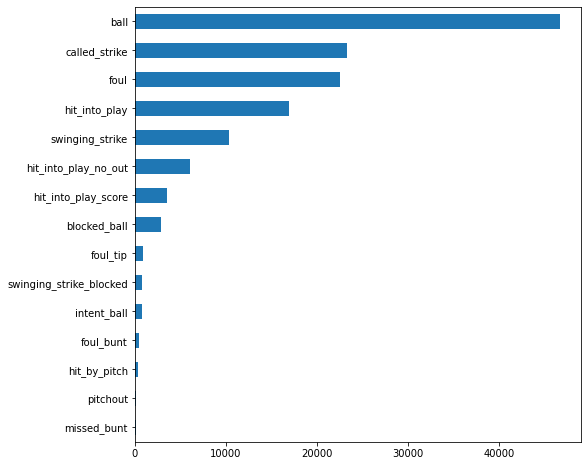

In [26]:
atKbo_11_18_StatCast['description'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))

pitch name : 구질

4-seam fastball이 많음

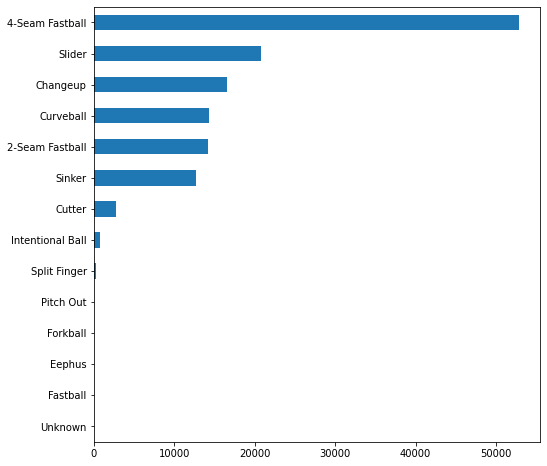

In [27]:
atKbo_11_18_StatCast['pitch_name'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8))

## **전처리**

### target 데이터 및 kbo에서의 첫 해 성적 추출

In [35]:
import pandas as pd

#kbo에서의 투수 성적
atKbo_11_18_KboRegSsn = pd.read_csv("kbo_yearly_foreigners_2011_2018.csv")
#mlb에서의 투수 성적
atKbo_11_18_MlbTot = pd.read_csv("fangraphs_foreigners_2011_2018.csv")
#kbo에서의 투구별 속성
atKbo_11_18_StatCast = pd.read_csv("baseball_savant_foreigners_2011_2018.csv")

atKbo_19_MlbTot = pd.read_csv("fangraphs_foreigners_2019.csv")

atKbo_19_StatCast = pd.read_csv("baseball_savant_foreigners_2019.csv")

**KBO, MLB, statcast 모두에 등록된 데이터가 필요하다(target 집단 설정)**

In [36]:
target=(set(atKbo_11_18_KboRegSsn['pitcher_name'])&
        set(atKbo_11_18_MlbTot['pitcher_name'])&
        set(atKbo_11_18_StatCast['pitcher_name']))
print(type(target))

<class 'set'>


이렇게 KBO, MLB, 스랫캐스트 데이터에 기록이 존재히는 타깃 집단이 추출됐습니다.

In [39]:
target=sorted(list(target))
len(target)

- year값이 가장 작은 인덱스를 추출해 변수에 저장
- 즉, kbo에서의 첫해 성적을 추출

In [47]:
# @통해 변수에 접근 가능
_idx=atKbo_11_18_KboRegSsn.query('pitcher_name in @target').groupby('pitcher_name')['year'].idxmin().values
firstYearInKBO_11_18=atKbo_11_18_KboRegSsn.loc[_idx,:]
firstYearInKBO_11_18.head()

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN
10,레나도,2017,삼성,6.80,243,70,11,27,6,28,NaN
11,레온,2016,삼성,11.25,40,16,2,1,1,7,NaN


### 유효한 데이터 산정하기

평균자책점(ERA) 이 중요한 데이터이긴 한데 투수가 상대한 타자의 수(TBF)에 영향을 받는 지표이다.

In [49]:
# kbo 첫 시즌에서 어느 정도 이닝도 먹어주면서 평균자책점도 낮은 선수들
TBF_median=firstYearInKBO_11_18['TBF'].median()
ERA_median=firstYearInKBO_11_18['ERA'].median()
Elite_11_18=firstYearInKBO_11_18.query('TBF >=@TBF_median & ERA<=@ERA_median')
Elite_11_18

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
12,레이예스,2013,SK,4.84,751,157,15,91,7,135,NaN
14,레일리,2015,롯데,3.91,768,182,20,57,15,134,1988년 06월 29일
25,린드블럼,2015,롯데,3.56,861,196,28,52,12,180,1987년 06월 15일
37,보우덴,2016,두산,3.80,742,159,17,54,6,160,NaN
43,샘슨,2018,한화,4.68,703,144,17,79,5,195,NaN
45,세든,2013,SK,2.98,780,169,14,73,11,160,NaN
48,소사,2012,KIA,3.54,614,137,9,39,8,104,NaN
67,웨버,2014,NC,4.58,512,132,13,42,3,85,NaN


In [50]:
len(Elite_11_18)

18

## **모델 구축과 검증**

- MLB데이터를 통하여 투수의 능력을 평가하는 제구력 지표와 아웃 확률 산출하는 모델을 만들 것임

- 해당 지표를 통해 투수들의 순위를 매긴 후 가장 높은 투수를 영입

### 선형 회귀 분석

- 미국에서의 팬그래프 데이터 : 연도별 통계 지표로는 고유 능력을 밝혀내기 쉽지 않음

- 다만 투수의 제구력은 투수 고유의 능력임(statcast data)

- 공이 홈 플레이트를 지날 때 위치를 시각화 해보자

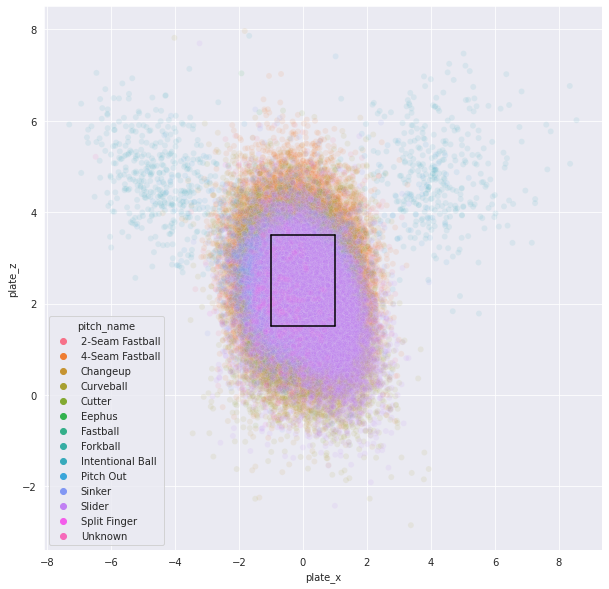

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(data=atKbo_11_18_StatCast.sort_values('pitch_name'),x='plate_x',y='plate_z',hue='pitch_name',alpha=0.1)
#(x1,x2) -> (y1,y2)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')

plt.show()

- 그 중에서 `called_strike` 만 시각화해보자

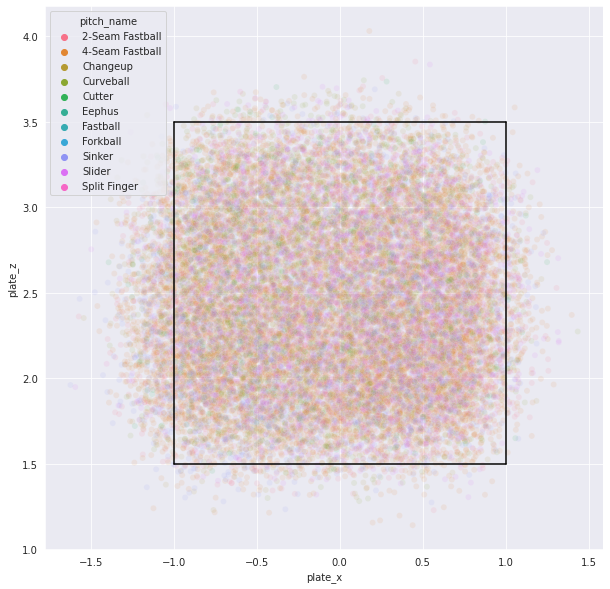

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(data=atKbo_11_18_StatCast.sort_values('pitch_name').\
                query('description=="called_strike"'),x='plate_x',y='plate_z',hue='pitch_name',alpha=0.1)
#(x1,x2) -> (y1,y2)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')

plt.show()

- 어떤 게 제구력이 좋은 것일까? 스트라이크 존의 가장자리에 꽂히는 구종이 많은 투수가 좋은 투수

In [ ]:
edgePitches=\
(atKbo_11_18_StatCast.query(
    '(plate_x >=0.8 & plate_x <=1.2 & plate_z >=1.3 & plate_z <=3.7)' | \
    '(plate_x >=0.8 & plate_x <=1.2 & plate_z >=1.3 & plate_z <=3.7)' | \
    '(plate_x >=0.8 & plate_x <=1.2 & plate_z >=1.3 & plate_z <=3.7)' | \
    '(plate_x >=0.8 & plate_x <=1.2 & plate_z >=1.3 & plate_z <=3.7)').
    query
)